In [ ]:
import pandas as pd
from fastai.vision.all import *
from ipywidgets import widgets
import os  

In [ ]:
!unzip "/content/drive/MyDrive/pnevmoniya (1).zip"

In [ ]:
pneumoniya_folder = "/content/train/PNEUMONIA"
normal_folder = "/content/train/NORMAL"
pneumoniya_files = os.listdir(pneumoniya_folder)
normal_files = os.listdir(normal_folder)
path = []
for file in pneumoniya_files:
    full_path = os.path.join(pneumoniya_folder, file)
    path.append(full_path)
for file in normal_files:
    full_path = os.path.join(normal_folder, file)
    path.append(full_path)
print(path)

In [4]:
transport=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)
# The path variable should point to the root directory containing "PNEUMONIA" and "NORMAL" folders.
dls=transport.dataloaders("/content/train")
learn=cnn_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 178MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.454773,0.230502,0.933845,02:04


epoch,train_loss,valid_loss,accuracy,time
0,0.162036,0.101158,0.969319,01:54
1,0.108634,0.085824,0.974113,01:55
2,0.061095,0.051573,0.984660,01:53
3,0.031753,0.050197,0.984660,01:54


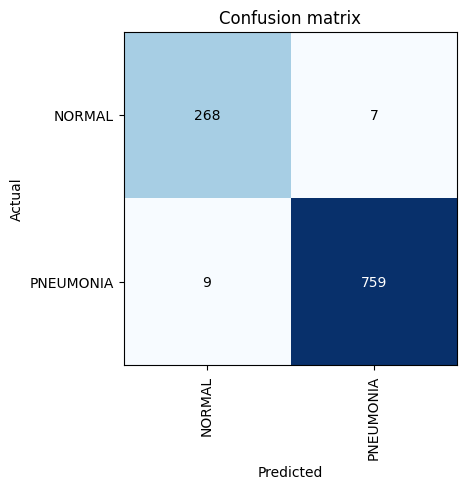

In [ ]:
# Check
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [7]:
upload=widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat: PNEUMONIA;
 Ehtimollik: 99.3833%


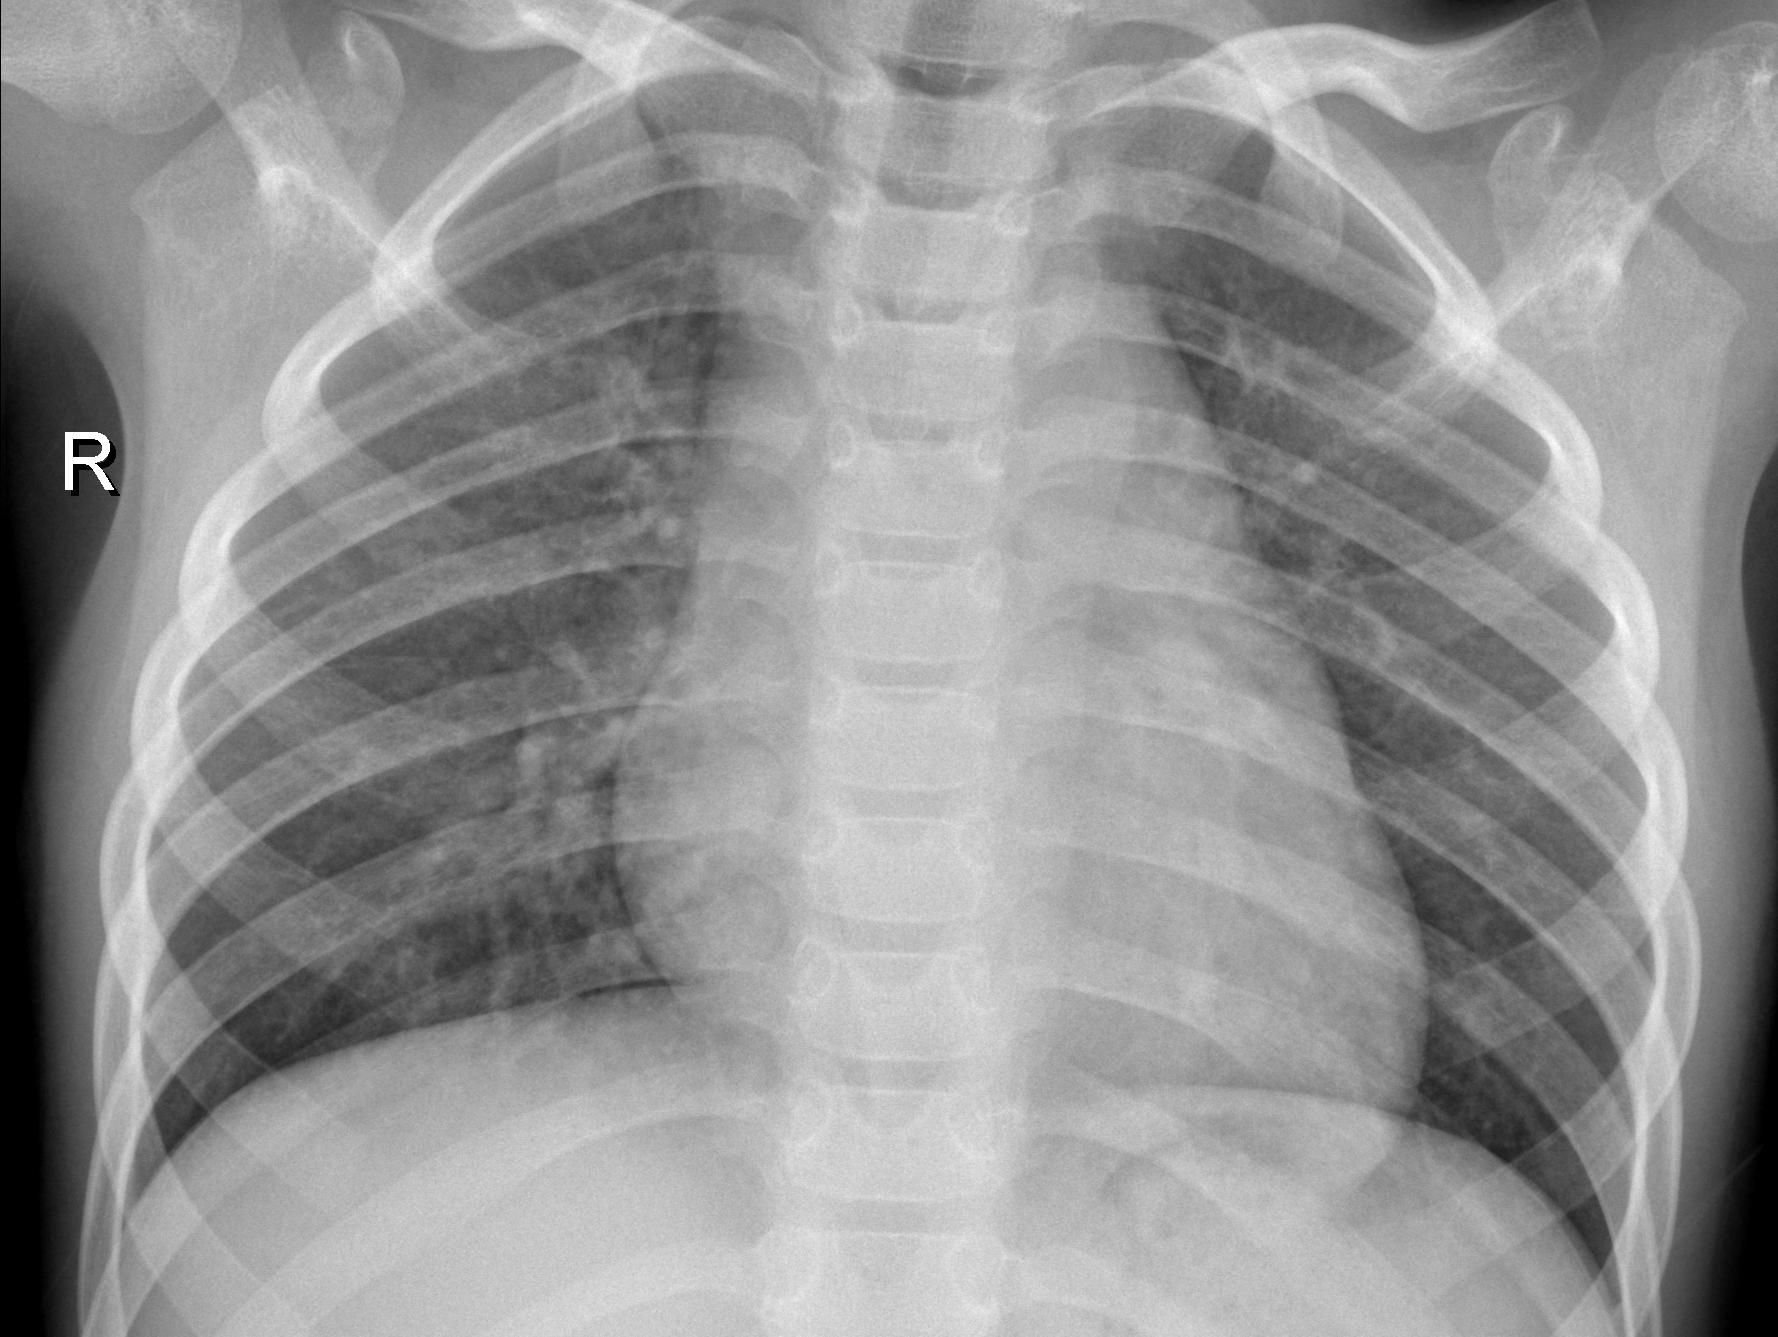

In [ ]:
img=PILImage.create(upload.data[-1])
pred,pred_idx,probs=learn.predict(img)
lbl_pred=f'Predict: {pred};\n Probability: {probs[pred_idx]*100:.04f}%'
print(lbl_pred)
img